### Contents Table

[Introduction](#Introduction)

[Data Gathering](#Data-Gathering)

[Data Accessing](#Data-Accessing)

[Data Wrangling](#Data-Wrangling)

[Making a Copy of The Dataset](#Making-a-Copy-of-The-Dataset)

[Exporting the Cleaned Data to a New CSV ](#Exporting-the-Cleaned-Data-to-a-New-CSV)

[Data Exploratory Analysis](#Data-Exploratory-Analysis)

- [Insight One](#Insight-One)

- [Insight Two](#Insight-Two)

- [Insight Three](#Insight-Three)

[Conclusion](#Conclusion)

[Limitations](#Limitations)

[References](#References)


## Introduction

> This project is focusing on data gathering, wrangling and visualisation analysis from WeRateDogs Twitter. During this project, data collected from various sources and in a variety of formats would be assessed and then clean in order to draw to out different insights about the dogs information.

From the dataset gathered, I will be looking at answering the following questions:

- Question 1. What is the percentage prediction of a dog to be true?


- Question 2. What are the 20 most popular tweeted dog breed? 


- Question 3. What are the top 20 dog breeds based on their retweet count?


- Question 4. What are the top 20 dog breeds based on their favourite count?


- Question 5. What dog stages are most tweeted?


- Question 6. What is the correleration between the retweet and favourite count?


- Question 7. What is the trend of retweet and favorite count from the earliest date to the latest date in the dataset?


- Question 8. Which of the sources do people tweet from the most?


- Question 9. What are the top 10 dog breed that received highest average rating? 


- Question 10. What is the average ratings for the different dog stages? 

## Data Gathering

> #### Data was gathered using different methods:
Data was gathered for this project composed using different methods from three pieces of data as described below:

- The WeRateDogs Twitter archive enhanced csv: This file will be downloaded manually by clicking the following link; twitter_archive_enhanced.csv. This data will be analysed by reading in a pandas dataframe df.


- The tweet image predictions tsv: This file image_predictions.tsv is hosted on Udacity's servers and will be downloaded programmatically using the requests library from the following URL; https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv. This is present in each tweet according to a neural network. It would be written to a file and stored in dataframe df_1.


- Using the tweet ID's gotten from the WeRateDogs Twitter archive csv, we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt  stored as txt file. Each tweet's JSON data will be written using json library to its own line. Then we will read this .txt file line by line into a pandas DataFrame saved as df_t

In [1]:
#importing all the libraries required for this project
import pandas as pd 
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import seaborn as sns
import tweepy
import datetime
from timeit import default_timer as timer
import re
import glob
import json 
from PIL import Image
from io import BytesIO
from IPython.display import HTML, display

In [2]:
#reading the provided csv file
df = pd.read_csv('./twitter-archive-enhanced.csv')

In [48]:
#getting the HTML
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [49]:
#reading the image file
df_1 = pd.read_csv('./image-predictions.tsv', sep='\t')

In [5]:
#accessing the twitter API
api_key = 'xxxxxxxxxx'
api_secret = 'xxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxx'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [6]:
# Querying the Twitter's API provided for JSON data for each tweet ID in the twitter enhanced archive csv
tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

# Saving each tweet's JSON as a new line in a .txt file

with open('tweet_json.txt', 'w+') as outfile:
    r = outfile.read()
    
    # This loop might take 20-30 minutes to run. 
    for tweet_id in tweet_ids:
        count = count + 1
        
#         print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
#         except tweepy.TweepError as e:
        except Exception as e:
#             print("Fail")
            fails_dict[tweet_id] = e

end = timer()
print(end - start)
print(fails_dict)

3609.0092904030003
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No st

In [26]:
#reading the json file in a Dataframe
with open('tweet_json.txt', 'r') as outfile: 
    data = outfile.read()  
    data = data.split("}\n")
    data = [d.strip() + "}" for d in data]
    data = list(filter(("}").__ne__, data))
    data = [json.loads(d) for d in data]
    print(data)
df_t = pd.DataFrame(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
# Create a DataFrame of selected columns required for this data with tweet ID, retweet_count and favorite count
df_t1 = df_t[['id', 'favorite_count', 'retweet_count']]
df_t1

,id,favorite_count,retweet_count
0,892420643555336193,33704,6973
1,892177421306343426,29229,5276
2,891815181378084864,21976,3465
3,891689557279858688,36800,7193
4,891327558926688256,35187,7719
...,...,...,...
2321,666049248165822465,88,36
2322,666044226329800704,246,115
2323,666033412701032449,100,36
2324,666029285002620928,112,39


In [51]:
#length of the successful result
print('the length of successful result', len(df_t))

# length of 
print('the length of failed result', len(fails_dict))

the length of successful result 2326
the length of failed result 30


 ##### The total timer to run the code above was about  2326secs which is ~ 38.76mins

## Data Accessing

> Data access can be considered a set of guidelines and techniques that are used to describe data, and to apply processes to assess and improve the quality of our data.

 After gathering all of our raw data above, now we must assess it visually and programmatically to look for quality and tidiness issues. The tidiness and quality issues would be documented accordingly.

In [52]:
#accessing the twitter enhanced archive csv
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [53]:
#the unique values in twitter enhanced archive csv information
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [54]:
#checking duplicates
df.duplicated().value_counts()

False    2356
dtype: int64

In [55]:
#checking null values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [56]:
#accessing the twitter enhanced arhive csv information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [57]:
#the description of the twitter enhanced archive csv
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [58]:
#accessing the twitter image-predictions
df_1.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [59]:
#twitter image-predictions information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
#checking null values for twitter image-predictions information
df_1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [61]:
#confirmming the unique values of twitter image-predictions information
df_1.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [62]:
#twitter image-predictions description
df_1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [63]:
#accessing the twitter json DataFrame
df_t1.head(2)

,id,favorite_count,retweet_count
0,892420643555336193,33704,6973
1,892177421306343426,29229,5276


In [64]:
#twitter json DataFrame information
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   favorite_count  2326 non-null   int64
 2   retweet_count   2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [65]:
df_t1.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [66]:
#twitter json DataFrame describtion
df_t1.describe()

,id,favorite_count,retweet_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417887e+17,7029.372743,2459.766982
std,6.822230e+16,10924.922446,4166.046580
min,6.660209e+17,0.000000,1.000000
25%,6.780814e+17,1219.500000,492.250000
50%,7.178159e+17,3037.000000,1143.500000
75%,7.986600e+17,8572.250000,2847.000000
max,8.924206e+17,144297.000000,70353.000000


##### Some of the quality and tidiness issues discovered while assessing the data includes:                                                                                                             
Data Quality Issues

- The timestamp datatype should be datetime and not an object.
- All tweet_ids should be strings.
- Many of the dogs were not distinguished as either doggo, floofer, pupper or puppo.
Some of the dog's names are incorrect (a','o','this','such','not','an','just','my','his','this','all','the','by' to...)
- There are lots of empty null values in columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and'retweeted_status_timestamp'.
- The rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176, 960, 666, 420...)
- The rating_denominator column has values other than 10 as well as very large numbers(e.g., 170, 150...).
Some dog names start with an uppercase letter, some with a lowercase letter.
- In the "source" column, we only want to extract the text and image link from the html "a" tag we need.

Data Tidiness Issues

- Dog stage columns of the same category, which is now divided into [doggo, flooter, pupper, puppo] columns, but we only need one stage column.
- The columns relevant for analysis in the three data frames can be merged together; they do not have to be in a separate table.
- Dates and times can be divided into date and time columns.                                                                                                    

## Making a Copy of The Dataset
> I would be working with these copies throughout the project, while the original dataframe would be for reference when needed.

In [67]:
#making copies of all the dataframes
df_archive = df.copy()
df_image = df_1.copy()
df_twitter = df_t1.copy()

## Data Wrangling

> In data cleaning, there are some basic things to consider before proceeding with the analysis of the data. This is to remove any inconsistencies or irregularities and to ensure that your data is of high relevance, high interactivity, and also for validity. There are several data cleaning processes that would be adopted through this dataset.

#### Cleaning up the quality  and tidiness issues

#### Define 
- Renaming the df_twitter['id']  to `tweet_id` enable merging on all tables.

#### Code

In [68]:
#renaming the id to twitter id 
df_twitter.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [69]:
#confirming the id has been changed to tweet_id
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   favorite_count  2326 non-null   int64
 2   retweet_count   2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


#### Define 
- Merging the three dataframes together: Here, I would be merging the three data sets using pandas merge and inner join. This returns a matching DataFrame row with the same characteristics as the three DataFrames.

#### Code

In [70]:
#merging the archive dataframe and image dataframe
df_archiveImage = pd.merge(df_archive, df_image, how = 'inner', on = 'tweet_id')

In [71]:
#merging the archive dataframe, image dataframe with twitter dataframe
df_all = pd.merge(df_archiveImage, df_twitter, how= 'inner', on = 'tweet_id')

#### Test

In [72]:
# confirming all the dataframes have been merged together
df_all.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
486,796080075804475393,NaN,NaN,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796080075...,...,0.973846,True,Tibetan_mastiff,0.01411,True,gibbon,0.002358,False,7999,2158


#### Define 
- Converting our datetimes in the dataset into Python datetimes-This is to enable us to do further analysis relating to a particular period within the dataset.


#### Code

In [73]:
# Transforming dataframes date to datetime
df_all['timestamp'] = pd.to_datetime(df_all.timestamp).dt.strftime('%Y-%m-%d')
df_all['timestamp'] = pd.to_datetime(df_all.timestamp)
df_all['month'] = pd.to_datetime(df_all.timestamp).dt.month
df_all['year'] = pd.to_datetime(df_all.timestamp).dt.year
df_all['day'] = pd.to_datetime(df_all.timestamp).dt.day

In [74]:
#confirming the timestamp columns have been changed to datetime datatype
df_all['timestamp'].dtypes
# df_all['month'].dtypes

dtype('<M8[ns]')

In [75]:
df_all['timestamp']

0      2017-08-01
1      2017-08-01
2      2017-07-31
3      2017-07-30
4      2017-07-29
          ...    
2051   2015-11-16
2052   2015-11-16
2053   2015-11-15
2054   2015-11-15
2055   2015-11-15
Name: timestamp, Length: 2056, dtype: datetime64[ns]

#### Define 
- Some of the dogs' names start with lower case, while others start with upper case. In order to achieve uniformity, I would be cleaning the column rows and ensuring they have the same case.

#### Code

In [76]:
#converting the names column to lower case
df_all['name'] = df_all['name'].apply(lambda x: x.lower())


#### Test

In [77]:
#asserting all the names are now lower case
df_all['name'].str.islower().all()

True

#### Define 
- Converting the tweet'ids in df_all to str

#### Code

In [78]:
#converting the datatype to string
df_all['tweet_id']= df_all['tweet_id'].astype(str)

#### Test

In [79]:
#asserting all tweet ids are now of str datatype
assert df_all['tweet_id'].dtypes == 'object'

#### Define 
- Converting the dogs names given as 'a','o','this','such','not','an','just','my','his','this','all','the','by' to 'None'.

#### Code

In [80]:
#gathering all the incorrect names in a list while looping through to None
incorrect_names = ['a','o','O','unacceptable','this','such','incredibly','not',
                   'an','just','my','his','this','all','the','by','very', 'infuriating','Bo']
for x in incorrect_names:
    incorrect = list(df_all.query('name == "'+x+'"').index)
    for i in incorrect:     
        df_all.name[i] = "None"      

#### Test

In [81]:
#this  confimrs if any of the incorrect names in the list is inputted, it returns empty 
name_change = df_all.loc[df_all['name']=='a']
name_change 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,month,year,day


#### Define 
- Convert the four columns in df_archive `doggo`, `flooter`, `pupper`, `puppo` into one column `stage`, then drop the four columns.

#### Code

In [82]:
#merging all the dog's breed to one column stage
df_all['stage'] = df_all['doggo'] + ',' + df_all['floofer'] + ','+ df_all['pupper'] + ',' + df_all['puppo']
df_all['stage'].value_counts()

None,None,None,None        1738
None,None,pupper,None       210
doggo,None,None,None         65
None,None,None,puppo         23
doggo,None,pupper,None       11
None,floofer,None,None        7
doggo,None,None,puppo         1
doggo,floofer,None,None       1
Name: stage, dtype: int64

In [83]:
#taking all the None values to be empty
df_all['stage'] = df_all['stage'].apply(lambda x: x.replace("None",""))

In [84]:
#writing a function that splits and categorsie the specific dog breed
def stage_split(x):
    x = x.split(',')
    x = ' '.join(x).split()
    x = ','.join(x)
    return x

In [85]:
#applying the function to all rows
df_all['stage'] = df_all['stage'].apply(stage_split)

In [86]:
df_all['stage']= df_all['stage'].replace("", "unknown")


In [87]:
df_all['stage'].value_counts()

unknown          1738
pupper            210
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [88]:
df_all['stage'].unique()

array(['unknown', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [89]:
#creating a variable to assign all the dogs breeds in different columns
dogs_categories = ['doggo', 'floofer', 'pupper', 'puppo']

In [90]:
#dropping all dogs_categories variable because its no longer required
df_all.drop(dogs_categories, axis =1, inplace=True)

#### Test

In [91]:
#asserting this colummn has been dropped
for dogs_c in dogs_categories:
    assert dogs_c not in df_all.columns 

#### Define 
- Extracting the tags from the source tweet is not required. The analysis should be focused on where the tweet and retweet came from, which is the source.

#### Code

In [92]:
#extracting the tags
df_all['source'] = df_all['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [93]:
#confirming the source only has details of the twwet source
df_all['source'].value_counts()

Twitter for iPhone    2016
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Define 
- In this dataset, we have a rating numerator and a rating denominator. We can get our fractional ratings by diving both ways. This would enable us to proceed further to get our average ratings during further analysis.
- This result would be inserted into a new column called ratings, and a new dataframe would be formed for any ratings less than or equal to 10, while we drop higher values because they are considered outliers.


#### Code

In [94]:
#creating a ratings fraction column where the numerator is divided by the denominator while this is also rounded up to two decimals
df_all['ratings'] = (df_all['rating_numerator']/df_all['rating_denominator']).round(2)


#### Test

In [95]:
#Previewing the new ratings columns results
df_all['ratings'].value_counts()

1.20      474
1.00      427
1.10      419
1.30      275
0.90      151
0.80       95
0.70       51
1.40       38
0.50       35
0.60       32
0.30       19
0.40       15
0.20       10
0.10        4
0.00        2
2.70        1
7.50        1
3.43        1
1.50        1
177.60      1
0.82        1
0.64        1
2.60        1
42.00       1
Name: ratings, dtype: int64

In [96]:
#confirmation that we habe only rations less than or equal to 10
df_all = df_all.loc[df_all['ratings'] <= 10]
df_all['ratings'].value_counts()

1.20    474
1.00    427
1.10    419
1.30    275
0.90    151
0.80     95
0.70     51
1.40     38
0.50     35
0.60     32
0.30     19
0.40     15
0.20     10
0.10      4
0.00      2
7.50      1
3.43      1
0.82      1
1.50      1
0.64      1
2.60      1
2.70      1
Name: ratings, dtype: int64

#### Define
- The prediction result in p1, p2 and p3 gives us information as regards the image we have, i.e to determine whether it is a dog or not. If all three predictions are true, this confirms it's a dog. If all three predictions are false, it is not a dog. However, I would be looking at the percentage of the dogs prediction before concluding with my analysis.
 


#### Code

In [97]:
#changing the datatype to a string to enable merge on a single column
df_all['p1_dog'] = df_all['p1_dog'].astype(str)
df_all['p2_dog'] = df_all['p2_dog'].astype(str)
df_all['p3_dog'] = df_all['p3_dog'].astype(str)

In [98]:
#creating a new column for the merger
df_all['dog_prediction'] = df_all['p1_dog'] + ',' + df_all['p2_dog'] + ','+ df_all['p3_dog']
df_all['dog_prediction'].value_counts()

True,True,True       1232
False,False,False     319
True,True,False       153
False,True,True       101
True,False,True        90
False,False,True       63
False,True,False       53
True,False,False       43
Name: dog_prediction, dtype: int64

In [99]:
#using a function to get the prediction percentage
def prediction_percentage(x):
    items = x.split(',')
    item_count = items.count('True')
    total_item = len(items)
    percentage_success = (item_count/ total_item) * 100
    return int(percentage_success)   

In [100]:
#creating a new column for the prediction success percentage
df_all['prediction'] = df_all['dog_prediction'].apply(prediction_percentage)

#### Test

In [101]:
#previewing the new df 'percentage_success_per'
df_all['prediction'].unique()

array([  0, 100,  33,  66])

#### Define
- This is to select the breed of the dogs based on the the dogs with the highest confidence

#### Code

In [102]:
#convert the confidence column to str in order to concatenate
df_all['p1_conf'] = df_all['p1_conf'].astype(str)
df_all['p2_conf'] = df_all['p2_conf'].astype(str)
df_all['p3_conf'] = df_all['p3_conf'].astype(str)

In [103]:
#merging the three data confidence column
df_all['dog_confidence'] = df_all['p1'] +':'+ df_all['p1_conf']  + ',' +  df_all['p2'] +':'+ df_all['p2_conf']  + ',' +  df_all['p3'] + ':' + df_all['p3_conf']


In [104]:
# function to splitting and getting the highest breed result
def find_dog(x):
    data = {}
    items = x.split(',')
    dog_1 = items[0]
    dog_1 = dog_1.split(':')
    data[dog_1[1]] = dog_1[0]
    
    dog_2 = items[1]
    dog_2 = dog_2.split(':')
    data[dog_2[1]] = dog_2[0]
    
    dog_3 = items[2]
    dog_3 = dog_3.split(':')
    data[dog_3[1]] = dog_3[0]

    
    max_confidence = max(dog_1[1], dog_2[1], dog_3[1])
    dog_name = data[max_confidence]
    return dog_name
    

In [105]:
#creating the new dog breed column
df_all['dog_breed'] = df_all['dog_confidence'].apply(find_dog)

#### Test

In [106]:
#confirming we only have highest breed dogs
df_all['dog_breed'].head(5)

0         orange
1      Chihuahua
2      Chihuahua
3    paper_towel
4         basset
Name: dog_breed, dtype: object

#### Define 
- Some of the dogs'breeds start with lower case, while others start with upper case. In order to achieve uniformity, I would be cleaning the column rows and ensuring they have the same case.

#### Code

In [107]:
df_all['dog_breed'] = df_all['dog_breed'].apply(lambda x: x.lower())

#### Test

In [108]:
#asserting all the breeds are now lower case
df_all['dog_breed'].str.islower().all()

True

#### Define
- Seperating the tweet link from the text column. This to extract the tweet url while i drop the text column.

#### Code

In [109]:
#extracting the tweet url from the text
df_all['tweet_url'] =   df_all['text'].apply(lambda x: re.search("(?P<url>https?://[^\s]+)", x).group("url"))

#### Test

In [110]:
#taking a sample of the tweet url for confirmation
df_all['tweet_url'].sample()

762    https://t.co/Vfc3eAFl2q
Name: tweet_url, dtype: object

#### Define 
- Drop Columns: Some columns in this dataset would be dropped due to their irrelevancy towards further analysis. These include  `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,`expanded_urls`, `retweeted_status_user_id'`, `retweeted_status_timestamp` etc.

In [111]:
# # dropping irrelevant colums
irrelevant_col = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'text', 'rating_numerator',
                  'rating_denominator','retweeted_status_user_id', 'expanded_urls', 'retweeted_status_timestamp',
                  'img_num', 'p1_conf', 'p1', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 
                  'p3_dog','dog_prediction', 'dog_confidence']
df_all.drop(irrelevant_col, axis =1, inplace=True)

In [112]:
#asserting the columns have been dropped
for coln in irrelevant_col:
    assert coln not in df_all.columns

In [113]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2055
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2054 non-null   object        
 1   timestamp       2054 non-null   datetime64[ns]
 2   source          2054 non-null   object        
 3   name            2054 non-null   object        
 4   jpg_url         2054 non-null   object        
 5   favorite_count  2054 non-null   int64         
 6   retweet_count   2054 non-null   int64         
 7   month           2054 non-null   int64         
 8   year            2054 non-null   int64         
 9   day             2054 non-null   int64         
 10  stage           2054 non-null   object        
 11  ratings         2054 non-null   float64       
 12  prediction      2054 non-null   int64         
 13  dog_breed       2054 non-null   object        
 14  tweet_url       2054 non-null   object        
dtypes: d

## Exporting the Cleaned Data to a New CSV

In [114]:
#export the cleaned data to a new csv file
df_master = df_all.to_csv('twitter_archive_master.csv', index = False)

## Data Exploratory Analysis

In [115]:
#using pandas to read the new csv file
df_master = pd.read_csv('twitter_archive_master.csv', sep =',')
df_master.head(2)

,tweet_id,timestamp,source,name,jpg_url,favorite_count,retweet_count,month,year,day,stage,ratings,prediction,dog_breed,tweet_url
0,892420643555336193,2017-08-01,Twitter for iPhone,phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,33704,6973,8,2017,1,unknown,1.3,0,orange,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01,Twitter for iPhone,tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,29229,5276,8,2017,1,unknown,1.3,100,chihuahua,https://t.co/0Xxu71qeIV


In [116]:
#information on the imported dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2054 non-null   int64  
 1   timestamp       2054 non-null   object 
 2   source          2054 non-null   object 
 3   name            2054 non-null   object 
 4   jpg_url         2054 non-null   object 
 5   favorite_count  2054 non-null   int64  
 6   retweet_count   2054 non-null   int64  
 7   month           2054 non-null   int64  
 8   year            2054 non-null   int64  
 9   day             2054 non-null   int64  
 10  stage           2054 non-null   object 
 11  ratings         2054 non-null   float64
 12  prediction      2054 non-null   int64  
 13  dog_breed       2054 non-null   object 
 14  tweet_url       2054 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 240.8+ KB


In [117]:
print(len(df_master.dog_breed.unique()))

379


In [118]:
#function to import multiple images from the url link given in the dataframe
def show_images(imagelist, file_name = None):
    
    
    imagesList=''.join(["<div style='width: 200px; height:200px; margin: 0px; float:left; border: 1px solid black;' >\
                         <img style='width: 120px; margin:0px auto;' src='%s' />\
                         <div style='text-align:center' >%s</div>\
                     </div>" %  (str(s['image_url']),  str(s['dog_breed']) )  for s in imagelist ])
    html_file = HTML(imagesList)
    display(html_file)
    if file_name is not None:
        with open('files/'+file_name+'.html', 'w') as f:
            f.write(imagesList)
    
#function to import multiple images from the url link given in the dataframe
def show_image(image_url, file_name = None):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    basewidth = 300
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    display(img)
    if file_name is not None:
        img = img.save('files/'+file_name)
    

### <span style='color:blue'> Question 1. What is the percentage prediction of a dog to be true? </span>

In [119]:
#grouping based on dod prediction percentage
dog_per_count=  df_master['prediction'].groupby(df_master['prediction']).size().reset_index(name='counts')
dog_per_count

,prediction,counts
0,0,319
1,33,159
2,66,344
3,100,1232


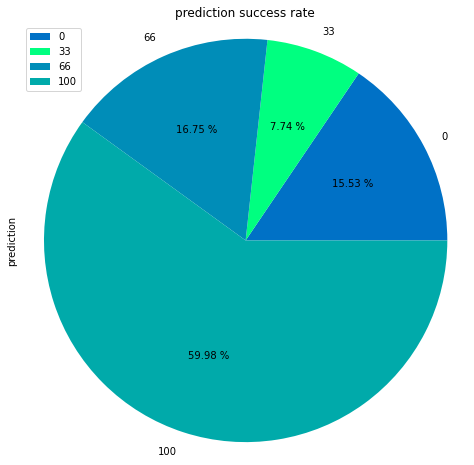

In [120]:
#pie chart to represent the dog prediction based on true an 
fig = plt.gcf()
fig.set_size_inches(8,8)
df_master['prediction'].groupby(df_master['prediction']).count().plot(kind='pie',
        y='prediction',  autopct='%.2f %%', 
        colors = ['#0071C6', '#00FF80', '#008DB8', '#00AAAA'], title = 'prediction success rate')
#setting the properties for the chart
plt.axis('equal')
plt.legend(loc = 'upper left')

#saving the chart
plt.savefig('files/prediction-success-rate.png')
plt.show()

#### The pie chart above shows that the dog prediction being predicted as true has the highest percentage

### <span style='color:blue'> Question 2. What are the 20 most popular tweeted dog breed? </span>

In [121]:
#the prediction_rate of 33% and below would be dropped and not considered, this is because the prediction success rate of being a dog is too low and this is most likely not a dog
df_breed = df_master.loc[df_master['prediction']>= 66].reset_index()
df_breed.sample()


,index,tweet_id,timestamp,source,name,jpg_url,favorite_count,retweet_count,month,year,day,stage,ratings,prediction,dog_breed,tweet_url
504,602,778027034220126208,2016-09-20,Twitter for iPhone,sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,6179,1490,9,2016,20,pupper,2.7,100,clumber,https://t.co/QFaUiIHxHq


In [122]:
# #Grouping based on count of dog breed
df_breed1 = df_breed.groupby(
            ['dog_breed'])['dog_breed'].count(
            ).reset_index(
            name='Count').sort_values(['Count'], 
            ascending=False)
df_breed2= df_breed1.head(20)
df_breed2

,dog_breed,Count
64,golden_retriever,150
86,labrador_retriever,93
107,pembroke,84
37,chihuahua,75
109,pug,50
108,pomeranian,37
146,toy_poodle,37
118,samoyed,37
38,chow,37
90,malamute,30


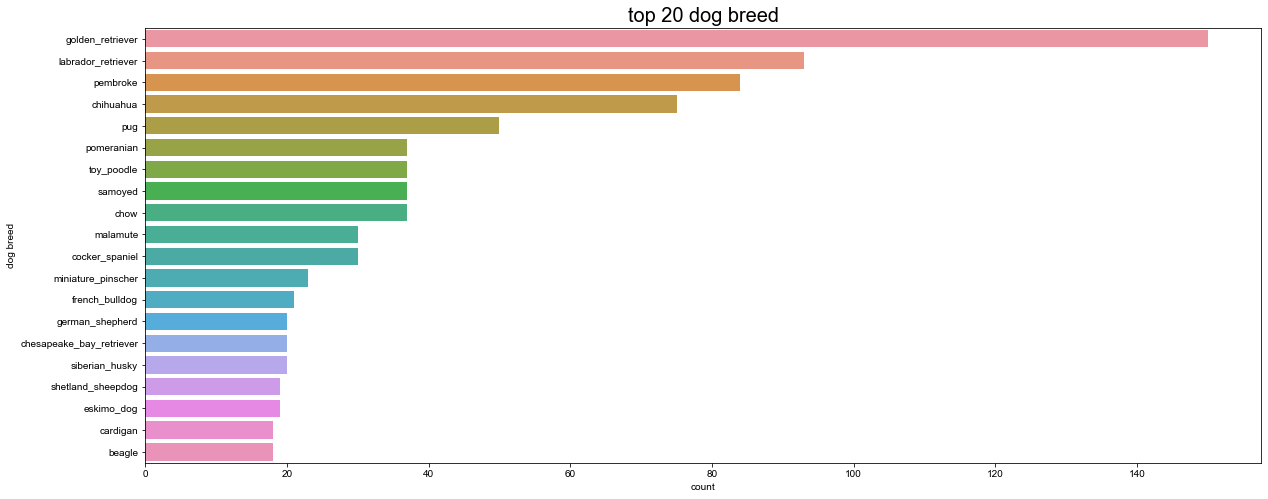

In [123]:
# plotting the results
plt.figure(figsize=(20,8))
sns.barplot(y = 'dog_breed', x = 'Count', data = df_breed2)

#setting the properties for the chart
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-pastel')
plt.xlabel('count')
plt.ylabel('dog breed')
plt.title('top 20 dog breed', fontsize= 20) 

#saving the chart
plt.savefig('files/20-most-popular-tweeted-dog-breed.png')
plt.show()

In [124]:
# getting the 20 image samples of the most tweeted dog breed 
imagelist = []
for item in df_breed2['dog_breed']:
    
    dog = df_master.loc[df_master['dog_breed'] == item].reset_index()
    
    first_dog = dog.iloc[[0]]
    
    image_url = first_dog.jpg_url.values[0]
    dog_breed = first_dog.dog_breed.values[0]
    
    imagelist.append({
        'image_url': image_url,
        'dog_breed': dog_breed
    })
     
show_images(imagelist,'the-20-image-samples-of-the-most-tweeted-dog-breed')

#### The above bar chart  and image above shows the top 20 most popular dog breed with golden retriever breed beimng the highest

### <span style='color:blue'> Question 3. What are the top 20 dog breeds based on their retweet count? </span>

In [125]:
#grouping the dog breeds based on the retweet count in descending order
retweet_dog_b1= df_breed.groupby('dog_breed')['retweet_count'].sum()
retweet_dog_b= retweet_dog_b1.sort_values(ascending=False)

#getting the top 20 dog breeds
top_dog_retweet = retweet_dog_b.head(20)
top_dog_retweet_image = top_dog_retweet.reset_index()

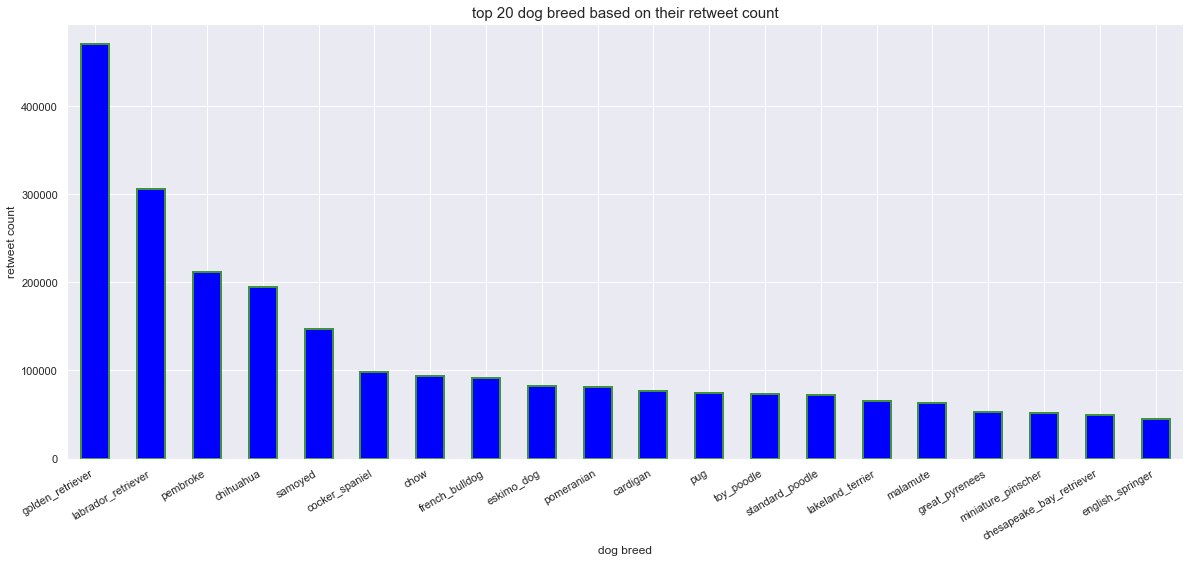

In [126]:
#plotting the result
fig = plt.figure(figsize=(20,8))
top_dog_retweet.plot.bar(color='blue', edgecolor="#409240", linewidth = 2)

#setting the properties for the chart
plt.title('top 20 dog breed based on their retweet count', fontsize= 15)
plt.xticks(rotation=30, ha='right')
plt.xlabel('dog breed')
plt.ylabel('retweet count')


#saving the chart
plt.savefig('files/top 20-dog-breeds-based-on-their-retweet-count.png')
plt.show()

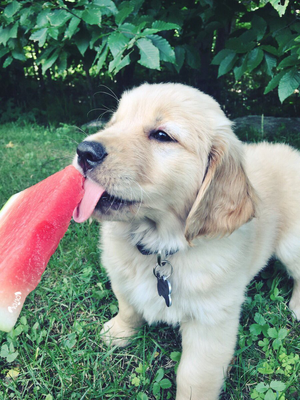

In [127]:
#getting the image sample of the top most retweeted dog
retweet_dog = top_dog_retweet_image.iloc[[0]].dog_breed.values[0]

dog_r = df_master.loc[df_master['dog_breed'] == retweet_dog]
    
first_dog = dog_r.iloc[[5]]

image_url = first_dog.jpg_url.values[0]
dog_breed = first_dog.dog_breed.values[0]

show_image(image_url, 'most-retweeted-dog.png')

#### The  bar chart above above shows the top 20 most popular dog breed based on their retweet count while the image shows a sample of the most retweeted dog breed

### <span style='color:blue'> Question 4. What are the top 20 dog breeds based on their favourite count? </span>

In [128]:
#grouping the dog breeds based on the favourite count in descending order
favorite_dog_b1= df_breed.groupby('dog_breed')['favorite_count'].sum()
favorite_dog_b= favorite_dog_b1.sort_values(ascending=False)

#getting the top 20 dog breeds
top_dog_favorite= favorite_dog_b.head(20)
top_dog_favorite_image = top_dog_favorite.reset_index()
top_dog_favorite_image

,dog_breed,favorite_count
0,golden_retriever,1466801
1,labrador_retriever,900550
2,pembroke,811704
3,chihuahua,584816
4,samoyed,392914
5,french_bulldog,374452
6,chow,316878
7,cocker_spaniel,267159
8,pomeranian,241183
9,eskimo_dog,233259


<Figure size 1440x576 with 0 Axes>

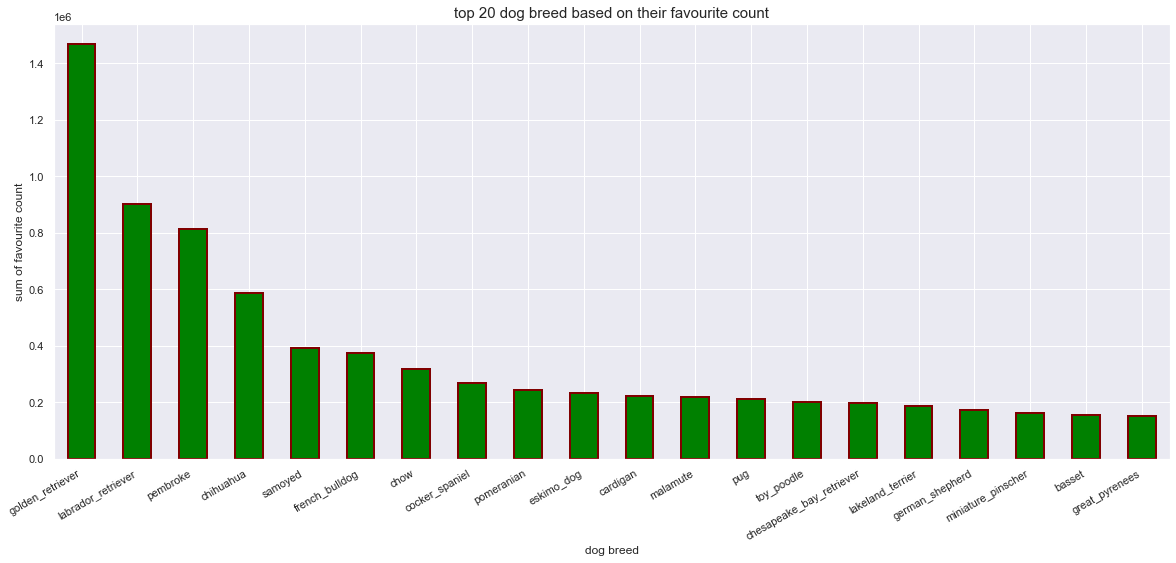

In [129]:
# plotting the results
fig = plt.figure(figsize=(20,8))
top_dog_favorite.plotfig = plt.figure(figsize=(20,8))
top_dog_favorite.plot.bar(edgecolor= 'maroon', color='green',
                         linewidth = 2)

#setting the properties for the chart
plt.title('top 20 dog breed based on their favourite count', fontsize= 15)
plt.xticks(rotation=30, ha='right')
plt.xlabel('dog breed')
plt.ylabel('sum of favourite count')

#saving the chart
plt.savefig('files/top-20-dog-breeds-based-on-their-favorite-count.png')
plt.show()

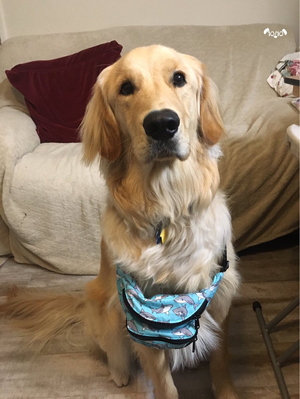

In [130]:
#getting the image sample of the top most favourite dog
favorite_dog = top_dog_favorite_image.iloc[[0]].dog_breed.values[0]

dog_f = df_master.loc[df_master['dog_breed'] == favorite_dog].reset_index()

first_dog = dog_f.iloc[[0]] 
image_url = first_dog.jpg_url.values[0]
show_image(image_url, 'favorite_dog.png')

#### The above bar chart shows the top 20 most popular dog breed based with golden retriever being the highest and the image shows its sample 

## Insight One
Based on the above findings, we can see that the golden retriever dog has the highest set retweet and also the highest favorite count. This points to the fact that the golden retriver is the most likely dog.

### <span style='color:blue'> Question 5. What dog stages are most tweeted? </span>

In [132]:
#ignoring the stages where dog stage == unknown
df_stage = df_master.loc[df_master['stage']!= 'unknown'].reset_index()
df_stage.sample()

,index,tweet_id,timestamp,source,name,jpg_url,favorite_count,retweet_count,month,year,day,stage,ratings,prediction,dog_breed,tweet_url
36,253,832998151111966721,2017-02-18,Twitter for iPhone,rhino,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,12403,2008,2,2017,18,doggo,1.3,100,boxer,https://t.co/QX1h0oqMz0


In [133]:
#grouping the dogs based on their stages
dog_stage1 = df_stage.groupby(['stage'])['stage'].count().reset_index(
            name='Count').sort_values(['Count'], 
            ascending=False)
dog_stage1

,stage,Count
5,pupper,210
0,doggo,65
6,puppo,23
2,"doggo,pupper",11
4,floofer,7
1,"doggo,floofer",1
3,"doggo,puppo",1


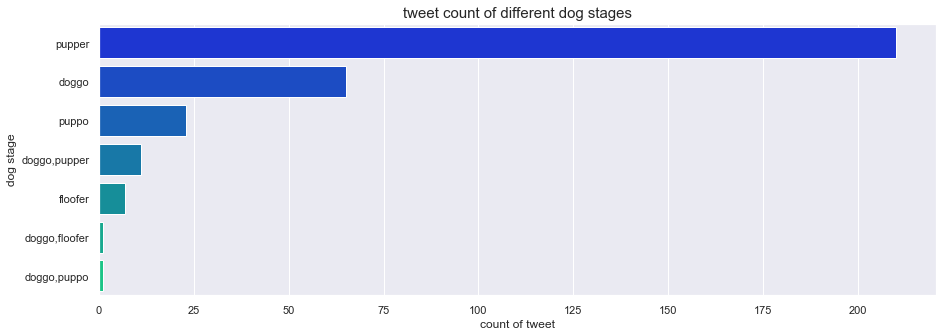

In [134]:
# plotting the results
plt.figure(figsize=(15,5))
sns.barplot(x = 'Count', y = 'stage', data = dog_stage1, palette = ("winter"))

#setting the properties for the chart
plt.title('tweet count of different dog stages',fontsize= 15) 
plt.xlabel('count of tweet')
plt.ylabel('dog stage')

#saving the chart
plt.savefig('files/the-most-tweeted-dog-stages.png')
plt.show()

#### From the chart above, it can be seen that the most tweeted dog stage is the pupper

### <span style='color:blue'> Question 6. What is the correleration between the retweet and favourite count? </span>

In [135]:
#get the correlation between retweet and favourite count
retweet_favourite_corr = df_master[['retweet_count', 'favorite_count']]
retweet_favourite_corr = retweet_favourite_corr.corr() 
retweet_favourite_corr

,retweet_count,favorite_count
retweet_count,1.000000,0.860873
favorite_count,0.860873,1.000000


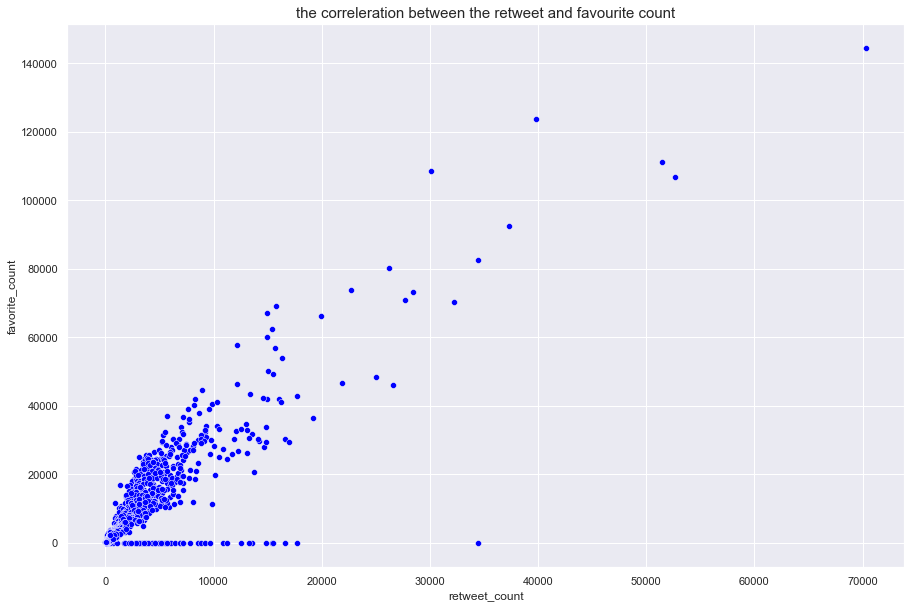

In [136]:
#plotting the results
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'retweet_count', y = 'favorite_count', data = df_master, color='blue')

#setting the properties for the chart
plt.title('the correleration between the retweet and favourite count', fontsize = 15) 
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')

#saving the chart
plt.savefig('files/correleration-between-the-retweet-and-favourite-count.png')
plt.show()

#### The scatter diagram indicates that there is  a strong positive correlation between dog retweet and favourite count.

### <span style='color:blue'> Question 7. What is the trend of retweet and favorite count from the earliest date to the latest date in the dataset? </span>

In [137]:
df_r = df_master.groupby(['month','year'])[['retweet_count','favorite_count']].sum().reset_index()
df_r = df_r.sort_values(["year", "month"])
df_r

,month,year,retweet_count,favorite_count
18,11,2015,122528,298898
20,12,2015,439609,1096466
0,1,2016,204678,573436
2,2,2016,143261,409463
4,3,2016,157312,466951
6,4,2016,69945,219180
8,5,2016,100478,303904
10,6,2016,285039,733155
12,7,2016,202450,516745
14,8,2016,193130,506315


In [138]:
#grouping the month and year based on retweet and favourite count
df_r = df_master.groupby(['month','year'])[['retweet_count','favorite_count']].sum().reset_index()
df_r = df_r.sort_values(["year", "month"])

#changeong the year and month datatype to str
df_r['year'] = df_r['year'].astype(str)
df_r['month'] = df_r['month'].astype(str)

#concatenate the month and year to get month-year
df_r['month_year'] = df_r['month'] + ", " + df_r['year']
df_r = df_r.reset_index()
df_r

,index,month,year,retweet_count,favorite_count,month_year
0,18,11,2015,122528,298898,"11, 2015"
1,20,12,2015,439609,1096466,"12, 2015"
2,0,1,2016,204678,573436,"1, 2016"
3,2,2,2016,143261,409463,"2, 2016"
4,4,3,2016,157312,466951,"3, 2016"
5,6,4,2016,69945,219180,"4, 2016"
6,8,5,2016,100478,303904,"5, 2016"
7,10,6,2016,285039,733155,"6, 2016"
8,12,7,2016,202450,516745,"7, 2016"
9,14,8,2016,193130,506315,"8, 2016"


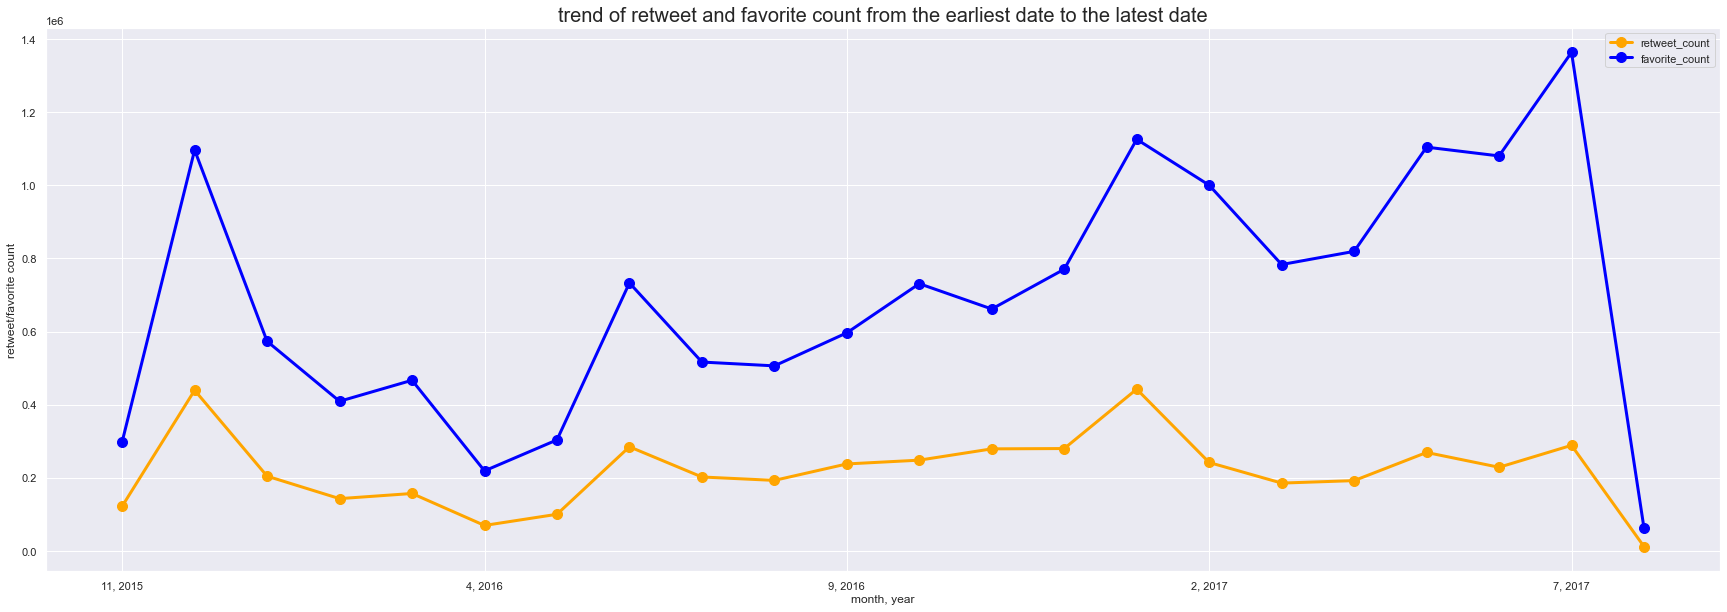

In [139]:
#plotting the results
x = 'month_year'
y = ['retweet_count','favorite_count']
df_r.plot(x=x, y=y, color=['orange', 'blue'], figsize=(30,10),  linewidth=3, marker='o', markersize=10)

#setting the properties for the chart
plt.title('trend of retweet and favorite count from the earliest date to the latest date', fontsize = 20)
plt.xlabel('month, year')
plt.ylabel('retweet/favorite count')

#saving the chart
plt.savefig('files/trend-of-retweet-and-favorite-count.png')
plt.show()

#### The chart above shows the trend between retweet and favorite count from the earliest date to the latest date in the dataset..

## Insight Two
The two diagrams above indicate that there is a strong relationship between retweets and favourite count. This shows that individuals mostly retweet tweets that they like.

### <span style='color:blue'> Question 8. Which of the sources do people tweet from the most? </span>

In [140]:
#grouping based the source count
df_source =  df_master['source'].groupby(df_master['source']).size().reset_index(name='counts')
df_source

,source,counts
0,TweetDeck,9
1,Twitter Web Client,30
2,Twitter for iPhone,2015


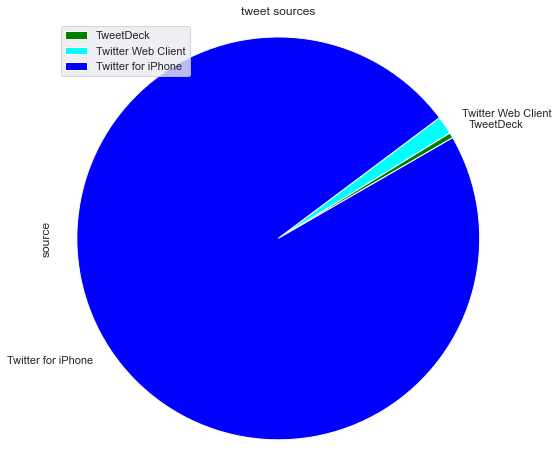

In [141]:
#plotting the results
fig = plt.gcf()
fig.set_size_inches(8,8) 
explode = [0, 0, 0]
df_master['source'].groupby(df_master['source']).count().plot(kind='pie',  startangle=30,
        colors = ['green', 'cyan', 'blue'], 
        title = 'tweet sources', explode = explode)

#setting the properties for the chart
plt.axis('equal')
plt.legend(loc = 'upper left')

#saving the chart
plt.savefig('files/tweet-sources.png')
plt.show()

#### The pie chart shows that users tweet mostly from iphone(Twitter for iphone) having a percentage of 98.10%, followed by Twitter Web Client having a percentage of 1.46% and TweetDeck  having a percentage of 0.44%

## Insight Three

It can be observed that users tweet mostly from their Iphones (Twitter for Iphone) having a percentage of 98.10%, followed by Twitter Web Client having a percentage of 1.46% and TweetDeck having a percentage of 0.44%.

I also noticed that no other device type except the iPhone was captured as part of the data point. This can either point to the fact that either tweets from other devices were omitted for this analysis or those data points were not properly captured. Either way, we can say that a lot of the contribution towards this data came from mobile users who use the iPhone.

### <span style='color:blue'> Question 9 . What are the top 10 dog breed that received highest average rating? </span>

In [142]:
#grouping the dog breed based on their ratings 
ratings_breed  = df_breed.groupby('dog_breed')['ratings'].mean().reset_index()

#getting the top 20 dog breeds
ratings_breed = ratings_breed.sort_values(['ratings'], ascending = False).head(10)
ratings_breed

,dog_breed,ratings
39,clumber,2.700000
94,military_uniform,1.400000
150,upright,1.300000
108,pomeranian,1.289189
117,saluki,1.250000
142,tibetan_mastiff,1.233333
28,briard,1.233333
75,ice_bear,1.225000
23,border_terrier,1.214286
85,kuvasz,1.206250


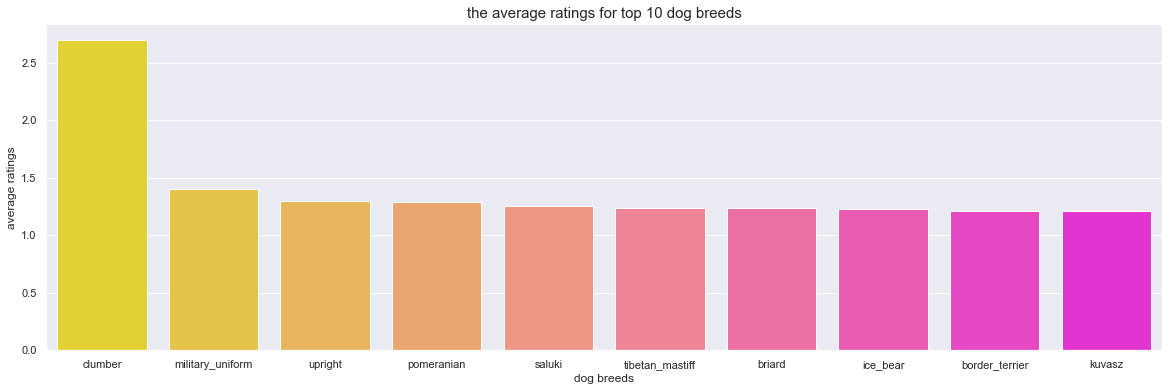

In [143]:
#plotting the results
plt.figure(figsize=(20,6))
sns.barplot(data = ratings_breed, x= 'dog_breed', y ='ratings', palette = 'spring_r')

#setting the properties for the chart
plt.title('the average ratings for top 10 dog breeds', fontsize = 15 ) 
plt.xlabel('dog breeds')
plt.ylabel('average ratings')


#saving the chart
plt.savefig('files/the-average-ratings-for-top-10-dog-breeds.png')
plt.show()

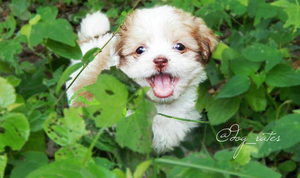

In [144]:
average_ratings_dog = ratings_breed.iloc[[0]].dog_breed.values[0]

dog_ratings = df_master.loc[df_master['dog_breed'] == average_ratings_dog].reset_index()

dog_r = dog_ratings.iloc[[0]] 
image_url = dog_r.jpg_url.values[0]
show_image(image_url, 'average_ratings_dog.png')

#### The bar chart above indicates dumber breed with the highest average ratings while the image shows its sample.

### <span style='color:blue'> Question 10 . What is the average ratings for the different dog stages? </span>

In [145]:
#grouping the dog breeds based on the average rating in descending order
breed_rating1 = df_breed.groupby('stage')['ratings'].mean()
dog_breed_rating = breed_rating1.sort_values(ascending=False).reset_index()
dog_breed_rating

,stage,ratings
0,"doggo,puppo",1.300000
1,"doggo,pupper",1.200000
2,floofer,1.200000
3,doggo,1.198000
4,puppo,1.195455
5,pupper,1.104575
6,"doggo,floofer",1.100000
7,unknown,1.090060


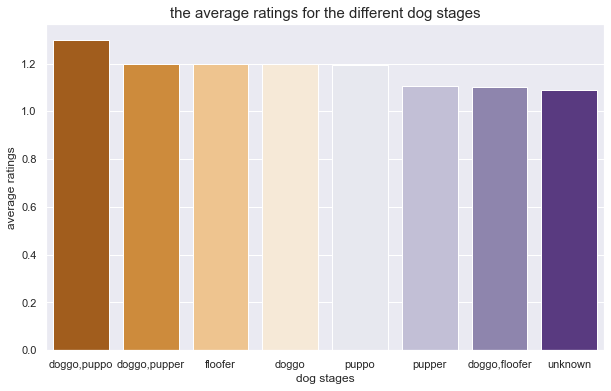

In [146]:
# plot the results
plt.figure(figsize=(10,6))
sns.barplot(data = dog_breed_rating, x= 'stage', y ='ratings', palette = 'PuOr')

#setting the properties for the chart
plt.title('the average ratings for the different dog stages', fontsize = 15)
plt.xlabel('dog stages')
plt.ylabel('average ratings')


#saving the chart
plt.savefig('files/the-average-ratings-for-the-different-dog-stages.png')
plt.show()

#### The bar chart above indicates the average ratings for the different dog stages with doggo,puppo stage being the highest

## Conclusion

This project was mostly a data wrangling project. From the overall analysis, certain conclusions have been drawn, which include the following:

The Golden Retriever breed, which seems to be a popular choice for pet dogs, is the most liked dog based on its interestingly high retweet and favourite count.

There is a strong linear relationship between the number of favourites and the number of retweets of a tweet, with a positive correlation coefficient of 0.86. This relationship might already be established as people will favourite what they retweet or the other way around.

The Doggo stage has the highest average ratings.

The dog breed with the highest average rating is the clumber. This indicates that the average rating of a dog is independent of the retweet and the likes.

## Limitations

> There was little or no understanding of the data information. For example, the dog stages aspect was not descriptive and clear enough, having to determine how a dog can be in more than one stage.

## References
##### https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290
##### https://pythonguides.com/matplotlib-plot-bar-chart/
##### https://stackabuse.com/matplotlib-pie-chart-tutorial-and-examples/
##### https://stackoverflow.com/questions/61102032/overlapping-labels-in-matplotlib-pie-chart
##### https://www.tutorialspoint.com/how-to-get-the-correlation-between-two-columns-in-pandas